# Data Analytic Project: E-commerce public dataset
- Name: Muhamad Insan Rahmatuloh
- Email: muhamad.insan.r@gmail.com
- Id Dicoding:

## Define Business Question

- Dimana saja kota tempat tinggal customer dan kota mana yang paling banyak, dari wilayah tsb dimana order paling banyak
- Produk apa saja yang paling banyak diorder
- Kategori produk apa saja yang memiliki skor review yang baik
- Bagaimana presentase status order
- Kategori produk yang paling banyak terjual
- Bagaimana analisis RFMnya

## Prepare for all libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import posixpath
from pathlib import Path
from scipy import stats

## Data Wrangling

### Gathering Data 

In [2]:
customers = pd.read_csv('dashboard/data/E-Commerce Public Dataset/customers_dataset.csv')
geolocation = gpd.read_file('dashboard/data/E-Commerce Public Dataset/geolocation_dataset.csv')
# geo_location = gpd.GeoDataFrame(geolocation, geometry=gpd.points_from_xy(geolocation['geolocation_lng'], geolocation['geolocation_lat']))
# geo_location.crs = {'init':'epsg:4326'}
order_items = pd.read_csv('dashboard/data/E-Commerce Public Dataset/order_items_dataset.csv')
order_payments = pd.read_csv('dashboard/data/E-Commerce Public Dataset/order_payments_dataset.csv')
order_reviews = pd.read_csv('dashboard/data/E-Commerce Public Dataset/order_reviews_dataset.csv')
orders = pd.read_csv('dashboard/data/E-Commerce Public Dataset/orders_dataset.csv')
product_cat_name = pd.read_csv('dashboard/data/E-Commerce Public Dataset/product_category_name_translation.csv')
products = pd.read_csv('dashboard/data/E-Commerce Public Dataset/products_dataset.csv')
sellers = pd.read_csv('dashboard/data/E-Commerce Public Dataset/sellers_dataset.csv')


### Assessing Data

#### Customers

In [3]:
customers.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
55421,6a9f8b26d13f6070c2be70b834949be9,5468c19d0df121d47a5d3dc792f6cf52,72863,novo gama,GO
42502,fef48c390f25186c8dce2a4ea986c213,35c8836f7ec75aefc11b1c77640c8c29,40140,salvador,BA
15634,c353167c1b4445649a80d52e656eeebc,dc62754eeded8cdfc5462e992ac20f13,8674,suzano,SP
62979,2069a41636b7238c9ebb007af92e652f,ed788f0856b85ee36ed4a52a964f1988,4305,sao paulo,SP
40854,be683d7033a4881645d055afc913b083,df0b86ca2d7e2c663bf8ecfb460d211a,12960,nazare paulista,SP
79439,51659c9420d923bc476f86828be8d7b5,9222caaba88ea29eb30172b47f3c554c,27260,volta redonda,RJ
51790,56041b9a34fcdf3368352cbb4fa67432,a5c62e7e896b7e6ed95d39714f51304a,11667,caraguatatuba,SP
40825,2d9e44d15887f511fd4e650144a25dc7,90bc6e6e28acc7d33938b97c961903a6,9941,diadema,SP
48597,f8b67d327058afa39382991d7173b1d7,7a3463eea32843cf42a1cbc026b117e5,33840,ribeirao das neves,MG
10771,90c74d2a364948608eb6b45bf576940d,81727e86a8b8a9d9dcc84e67cd824a5f,23585,rio de janeiro,RJ


In [4]:
customers.shape

(99441, 5)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


#### Geolocation

In [6]:
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
409780,20260,-22.91594935172878,-43.21235613840123,rio de janeiro,RJ,None
245029,09940,-23.66912980821169,-46.604050872756574,diadema,SP,None
897552,87400,-23.792416911832934,-53.058119586588255,cruzeiro do oeste,PR,None
250962,11250,-23.835895738312143,-46.123480421880366,bertioga,SP,None
812594,76700,-14.750848114808623,-50.5730980579047,mozarlandia,GO,None


In [7]:
geolocation.shape

(1000163, 6)

In [72]:
geolocation.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 6 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   geolocation_zip_code_prefix  1000163 non-null  object  
 1   geolocation_lat              1000163 non-null  object  
 2   geolocation_lng              1000163 non-null  object  
 3   geolocation_city             1000163 non-null  object  
 4   geolocation_state            1000163 non-null  object  
 5   geometry                     0 non-null        geometry
dtypes: geometry(1), object(5)
memory usage: 45.8+ MB


In [82]:
geolocation['geolocation_zip_code_prefix'] = pd.to_numeric(geolocation['geolocation_zip_code_prefix'])

#### Order Items

In [10]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
106949,f30d59d024a381d49e85a1ecfe0d79c0,1,2bd9b51a9ab079e095aca987845d3266,81f89e42267213cb94da7ddc301651da,2018-08-21 04:15:28,75.0,18.63
28053,3fe3d1ba41519dd81c6d6ebde0c8801b,1,a961143b53bf771400f1bc6bdf396e8d,5011f0d93373a4c5753adf58ca77af8d,2017-08-24 03:24:14,19.9,15.10
68858,9d4837e9f15d4e57e4783e22786cb407,5,36f60d45225e60c7da4558b070ce4b60,f457c46070d02cadd8a68551231220dd,2018-02-12 18:54:55,89.9,10.16
56550,80a0f4a6ed94bfc597b4997d2afcd70e,2,268dea74d2aec39c04aecdf03081ac60,b5f49fe968dff6b112861e6cd8e192ef,2018-01-25 09:07:54,64.9,14.32
27369,3e43e4dedffaf5c15e579786d0b5317f,1,970694629024df557d9b71b3088a488d,e504a4e2efaa45cbff7e268a2c58c956,2018-08-07 04:15:24,99.9,34.46


In [11]:
order_items.shape

(112650, 7)

In [12]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [13]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<Axes: ylabel='Count'>

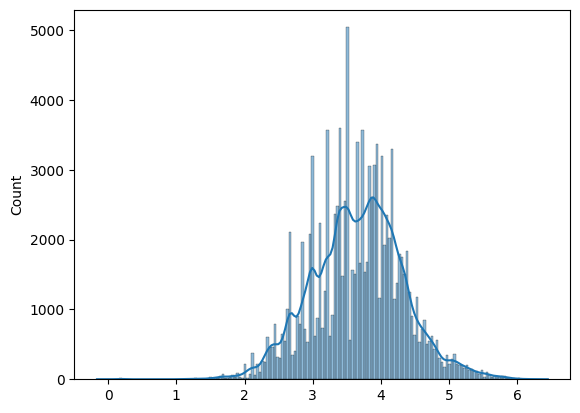

In [14]:
normal_price = stats.boxcox(order_items.price)
sns.histplot(normal_price[0],  kde=True)

#### Order Payments

In [15]:
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
88270,59e4b15bc4ba90075398df42e550a289,1,credit_card,4,73.34
31294,c64bba38c488c2f4362e11cf93ebbed4,1,boleto,1,47.45
39680,0424ec4615df28c58201d0828ac20cdd,1,credit_card,6,168.29
58167,114b047e7bac7728e93bdf39f7031875,1,credit_card,2,123.18
76472,a08f93229ff75ba67fbdc36e6ad7c5c7,1,credit_card,2,260.73


In [16]:
order_payments.shape

(103886, 5)

In [17]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [61]:
order_payments.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

#### Orders Reviews

In [19]:
order_reviews.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
19063,5e8cf40b4400760c62e1a3e99683c0c9,013b811ba81339b7634ab5231c547e6a,4,NaN,Bom produto,2017-11-02 00:00:00,2017-11-03 18:27:12
53280,a3812bd8ec5b86324afbd38669d943d7,77baa217632fcbf3656de4ec4a66b0c4,4,NaN,NaN,2018-05-17 00:00:00,2018-05-21 14:39:01
13208,b31f410cd838ae35780775dbee0cdcee,b1cc2415253bed6a394cec36a9280797,3,NaN,NaN,2018-03-16 00:00:00,2018-03-16 11:39:51
83392,66938df90b37ab05894f54b9c75b9e4c,e2e223aa7d0f409950eb995e6c759475,5,NaN,NaN,2017-03-25 00:00:00,2017-03-25 21:27:46
6272,bb5a44bfe1d17fe278f7c14c375df98b,c2fd626797fb5ca566e69305eebca31a,1,NaN,"Gostei de comprar nas lannister, envio rápido ...",2018-04-05 00:00:00,2018-04-11 14:26:20


In [20]:
order_reviews.shape

(99224, 7)

In [21]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Orders

In [66]:
orders.sample(5)

,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
92203,delivered,2018-02-15 17:38:41,2018-02-16 07:47:07,2018-02-21 03:10:08,2018-02-26 21:28:06,2018-03-14,10.0
56153,unavailable,2017-10-08 11:02:21,2017-10-09 22:35:26,NaT,NaT,2017-11-03,NaN
34970,delivered,2017-02-07 09:07:17,2017-02-07 09:23:11,2017-02-10 12:09:13,2017-02-14 13:49:03,2017-03-14,7.0
5658,delivered,2018-08-16 11:28:46,2018-08-16 11:43:50,2018-08-17 12:40:00,2018-08-24 09:41:35,2018-08-31,7.0
92700,delivered,2017-10-18 19:07:46,2017-10-18 19:28:38,2017-10-20 11:24:16,2017-10-25 17:35:58,2017-11-06,6.0


In [24]:
orders.shape

(99441, 8)

In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
cols = ['order_purchase_timestamp','order_delivered_carrier_date','order_approved_at','order_delivered_customer_date','order_estimated_delivery_date']

for c in cols:
    orders[c] = pd.to_datetime(orders[c])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

#### Product Category Name Translation

In [28]:
product_cat_name.sample(5)

,product_category_name,product_category_name_english
48,livros_interesse_geral,books_general_interest
39,livros_tecnicos,books_technical
31,market_place,market_place
54,artigos_de_natal,christmas_supplies
65,dvds_blu_ray,dvds_blu_ray


In [29]:
product_cat_name.shape

(71, 2)

In [30]:
product_cat_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


#### Products

In [31]:
products.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
15550,fd28b464cf1660a67606f7b48c8c38c6,cama_mesa_banho,54.0,497.0,4.0,700.0,32.0,11.0,23.0
22880,a396c58c1c3c3bc927aa57ed987a75ec,relogios_presentes,57.0,624.0,2.0,270.0,18.0,13.0,16.0
3295,fbbccb1d65066d96ce4cc9edef2f5a0a,pet_shop,51.0,301.0,1.0,2500.0,65.0,50.0,45.0
25894,515778ec4dcf81869530fe93e6710ef8,automotivo,54.0,383.0,2.0,100.0,16.0,10.0,15.0
5249,ba6060edcfb9011f13da2fcdc78a01b8,automotivo,59.0,298.0,1.0,1700.0,30.0,14.0,30.0


In [32]:
products.shape

(32951, 9)

In [33]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [34]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [35]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
products[products.product_id == '1fbeaaa01377d3f600de52f455ef578c']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11975,1fbeaaa01377d3f600de52f455ef578c,cama_mesa_banho,55.0,664.0,1.0,2800.0,44.0,10.0,34.0


#### Sellers

In [100]:
sellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [38]:
sellers.shape

(3095, 4)

In [39]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [97]:
sellers.zip_code_prefix.value_counts().head(10)

zip_code_prefix
14940    49
13660    10
13920     9
16200     9
87050     8
14020     8
1026      8
37540     7
13481     7
35530     6
Name: count, dtype: int64

In [96]:
sellers.zip_code_prefix.nunique()

2246

### Cleaning Data

In [40]:
# change data type on Order Items of shipping_limit_date to date
order_items.shipping_limit_date = pd.to_datetime(order_items['shipping_limit_date'])

# change data type on order review of the review_creation_date and review_answer_timestamp to date 
order_reviews.review_creation_date = pd.to_datetime(order_reviews.review_creation_date)
order_reviews.review_answer_timestamp = pd.to_datetime(order_reviews.review_answer_timestamp)

# change data type on Orders of the order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, 
# order_delivered_customer_date, order_estimated_delivery_date to date 
# orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp.str.strip())
# orders.order_approved_at = pd.to_datetime(orders.order_approved_at.str.strip())
# orders.order_delivered_carrier_date = pd.to_datetime(orders.order_delivered_carrier_date.str.strip())
# orders.order_delivered_customer_date = pd.to_datetime(orders.order_delivered_customer_date.str.strip())
# orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date.str.strip())


In [41]:
# cleaning null value on Orders dataset (99441, 8)
# orders.isnull().sum()
# orders.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

# cleaning null value on Products dataset (32951, 9)
# products.isnull().sum()
# products.dropna(inplace=True)

In [42]:
print(f'order {orders.shape} & products {products.shape}')

order (99441, 8) & products (32951, 9)


## Exploratory Data Analysis (EDA)

#### Explore Customer

In [43]:
customers[customers.customer_state == 'CE']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
59,a905baa530258422594f1b05615bd225,c80da60feddb7cf8325bd104032e314a,60140,fortaleza,CE
70,4c7241af24b5344cb01fe687643de4fe,b157c176c3fe04914fde33f2dc8b878a,60336,fortaleza,CE
103,126cf4e9fd189d2d64bc9b112fd6a5e8,90d479448b39ad9586d05da64cfb695b,62016,sobral,CE
303,3aec4688b93d6061ec5061721ad493a7,7b0cae22ae2b6cf88163a50600da4ee2,60181,fortaleza,CE
422,522a6e7c1f1f992ac81be6abefa46294,282ebddb3e85120b1652204758fc332b,60055,fortaleza,CE
...,...,...,...,...,...
99072,18e56af97c2f24afcfaf7aa97ad2b969,d9ff7e37d7bf448abb783a6e56462d93,63765,sucesso,CE
99171,3218724bc18c442e58bd39608b0f100a,d9151698fc7193669598995a4c6f494f,62800,aracati,CE
99328,1e03a2aa5714007700c8e727849cf123,54a2d9cbeb08a11268085529cfe2524f,60440,fortaleza,CE
99343,9289d8bcd95805bc1ac27c949a99da98,ec8aaeb3869352e348097f26f4c49ee3,60864,fortaleza,CE


In [44]:
custby_city_states = customers.groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(by='customer_id', ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})
custby_city_states.head()

,customer_city,jml_cust
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


In [45]:
custby_states = customers.groupby(by=['customer_state']).customer_id.nunique().sort_values(ascending=False).to_frame().reset_index().rename(columns={'customer_id':'jml_cust'})
custby_states.sample(3)

,customer_state,jml_cust
6,BA,3380
8,ES,2033
7,DF,2140


#### Explore Order

In [5]:
order_items.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
53851,7a72862f08ad9a6b9debda8e2a65d762,1,7e0dc102074f8285580c9777f79c90cf,e26901d5ab434ce92fd9b5c256820a4e,2017-03-21 19:47:34,34.9,24.84
11442,1a0b81380bc0d5b206b3e4ed62cf1791,1,4ff6d690de7f98ab534ab22881bf5819,282f23a9769b2690c5dda22e316f9941,2018-02-28 18:00:20,53.4,17.62
81772,b9e021cd678385c5fe5e9ef35d5bae49,1,81c6b0f031d89938fce1df449b3b464b,537eb890efff034a88679788b647c564,2018-06-18 21:23:05,18.9,7.55


In [6]:
orders.sample(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
58348,4a21e3eb07861993fbaae74314b0d224,ffc0c21bf66cb129c62d8f89ed19c26c,delivered,2018-07-22 16:56:59,2018-07-23 12:31:42,2018-07-23 13:27:00,2018-07-30 16:42:11,2018-08-15 00:00:00
32239,1a785632cbf5301f146c5b3c67268911,9b1235a30973118303a0a017d3b5793b,delivered,2018-08-12 18:04:00,2018-08-12 18:24:19,2018-08-13 17:20:00,2018-08-21 17:41:09,2018-08-27 00:00:00


In [ ]:
orders['delivery_time'] = (orders.order_delivered_customer_date - orders.order_approved_at).dt.days
# del_time.apply(lambda x: x.total_seconds())/86400
orders.describe()

In [8]:
orders_items = pd.merge(left=orders, right=order_items, on='order_id', how='inner')
orders_items['total_price'] = orders_items.order_item_id * orders_items.price
orders_items.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
34750,b778b1973ac33ebdb97a4d9b25426c61,8e64ee8a8087e2105aacb3eb1611242b,delivered,2017-04-21 11:51:07,2017-04-24 16:30:20,2017-04-25 11:47:58,2017-05-03 11:54:40,2017-05-30 00:00:00,1,ebee6703e867082f455a058a8bd04092,fc906263ca5083d09dce42fe02247800,2017-04-28 16:30:20,39.0,20.80,39.0
31729,9d861ac27142c9f86a4787f50247f486,dda506e73a7b3cad2ce4b09e0ffb5e68,delivered,2017-07-20 17:32:44,2017-07-20 17:45:18,2017-07-25 21:47:44,2017-08-14 13:13:36,2017-08-21 00:00:00,1,965ed8ce606fae58ee076e77023d9a0b,fa1c13f2614d7b5c4749cbc52fecda94,2017-07-26 17:45:18,259.9,18.26,259.9
2370,4f248cce45f86c074a86cbf117d2b1b5,78b62d86956ff92fb90758963d061c6b,delivered,2018-06-17 20:16:55,2018-06-17 20:33:53,2018-06-20 12:16:00,2018-06-21 16:32:17,2018-07-26 00:00:00,1,ae5f5d4cad780bc59652d9ca6ba3b1a7,89f69225956f951295ca4c7fb1266553,2018-06-21 20:31:25,79.9,14.72,79.9
92584,f77069f53023a7b046bf919f50bb2dd7,17dd52ad2465bdedb0c78d744ba82f84,delivered,2017-12-06 14:17:39,2017-12-06 14:32:04,2017-12-07 16:52:20,2017-12-18 21:18:54,2018-01-08 00:00:00,2,9a803c36a15de3fd981f42c0e4cabdea,c3cfdc648177fdbbbb35635a37472c53,2017-12-14 14:30:31,148.9,36.40,297.8
94701,61d54e16685b5da6db2e220e6588c376,21ce8c10c9805097875674f79709391b,delivered,2018-07-18 11:43:20,2018-07-18 11:55:16,2018-07-20 11:12:00,2018-07-25 15:26:28,2018-08-14 00:00:00,1,79161ecc0839d5d58374918d289ee6c7,5795aebfe331fbcd02a2c4b679fb7952,2018-07-24 11:55:16,185.0,18.23,185.0


In [9]:
orders_items_payments = pd.merge(left=orders_items, right=order_payments, on='order_id')
print(orders_items_payments.shape)
orders_items_payments.sample(3)
# world.continent.value_counts()

(117601, 19)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
43305,6112465ce26bd647dea31c662d04cbde,a053b95d32607c31f7a02ddc583b7e49,delivered,2018-03-03 12:04:13,2018-03-03 12:15:42,2018-03-05 19:42:45,2018-03-09 01:49:21,2018-03-22 00:00:00,1,a237de12bdf0bfe4fe220bae65a89731,6c7d50c24b3ccd2fd83b44d8bb34e073,2018-03-08 12:15:42,45.91,13.37,45.91,1,credit_card,2,118.56
107282,eaa755795bc07ae1c3d55d7f6efe1dfc,4f6d55f91cc55993f83d3f289af748ff,delivered,2018-02-09 09:45:41,2018-02-10 02:35:47,2018-02-16 16:56:34,2018-02-26 20:19:06,2018-03-07 00:00:00,1,08c816d9a716567bf436173ef6f5f12e,5656537e588803a555b8eb41f07a944b,2018-02-15 02:35:47,19.89,17.63,19.89,1,boleto,1,37.52
22880,bb780b0ed67fce7c92b2772fde29bc6e,a13b59f2362357007db99730023baa32,delivered,2017-02-05 14:23:56,2017-02-07 04:05:12,2017-02-09 05:25:41,2017-02-15 17:06:05,2017-03-01 00:00:00,1,26c574b434aeee44ae054dcb540f2ebe,7b0df942f46435babab05d49b744b2c4,2017-02-09 14:23:56,290.47,14.61,290.47,1,boleto,1,305.08


In [10]:
all_orders = pd.merge(left=orders_items_payments, right=order_reviews, on='order_id')
all_orders.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
39863,ecdc847ed73d804147eb009dec3a0a0c,c6a9becaa9e9a12a50b0f9ec880b67d3,delivered,2017-05-11 07:17:44,2017-05-11 08:02:32,2017-05-11 10:12:05,2017-05-12 14:52:54,2017-05-22 00:00:00,1,25d6edcd216a9ee579f19f92d694f7d5,...,1,credit_card,2,20.75,9ad64902b6c9bfad48bbe4d17e4dcb4b,4,NaN,"Entrega super rápida, parabéns!",2017-05-13 00:00:00,2017-05-14 14:37:54
54454,43e1cbf9959b24b39acb40a44ff3655b,cbf080b962ac028e6a6ee3ad5419ff05,delivered,2018-05-06 13:04:09,2018-05-06 13:33:04,2018-05-07 15:11:00,2018-05-08 20:14:49,2018-06-07 00:00:00,1,b53de21d6ac42f6bc21b82af0e89a002,...,1,credit_card,3,78.72,7d0474879bbf5803661c0065c02c71c0,5,NaN,NaN,2018-05-09 00:00:00,2018-05-13 23:37:01
6652,2ee77ee9cd8288db14b7af33ba98c163,196f17bb795d8e0ce677230cc1781059,delivered,2017-10-20 13:15:37,2017-10-20 13:28:07,2017-10-20 20:22:37,2017-10-21 15:43:44,2017-11-01 00:00:00,1,17a019676883dce326999c11a46a14f0,...,1,credit_card,1,31.77,2040f26b60ebec871246a85e13e90ff6,5,NaN,a entrega foi rapida,2017-10-22 00:00:00,2017-10-27 16:41:50


In [11]:
cust_list = customers.customer_id.to_list()
customers['cust_status'] = orders.customer_id.apply(lambda x: "Active" if x in cust_list else "In-Active")

customers.cust_status.value_counts()

cust_status
Active    99441
Name: count, dtype: int64

#### Explore Products

In [53]:
print(products.shape)
products.sample(3)

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
29747,d9ef8862928998b3921fa52eb30c5fe2,beleza_saude,42.0,361.0,1.0,100.0,27.0,28.0,27.0
20896,86003fbbec2202f29e74ada517cec5a8,cama_mesa_banho,47.0,117.0,1.0,300.0,40.0,4.0,30.0
20342,dd12ee0c5287865a05d9a873944680bc,ferramentas_jardim,26.0,201.0,1.0,500.0,16.0,21.0,11.0


In [54]:
print(product_cat_name.shape)
product_cat_name.sample(3)

(71, 2)


,product_category_name,product_category_name_english
37,agro_industria_e_comercio,agro_industry_and_commerce
58,bebidas,drinks
67,artes_e_artesanato,arts_and_craftmanship


In [13]:
products_cat_name_translation = pd.merge(left=products, right=product_cat_name, on='product_category_name')
print(products_cat_name_translation.shape)
products_cat_name_translation.sample(3)

(32328, 10)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
24553,e122fc0e32b49bd6dec4d37d5d90691d,telefonia,58.0,1235.0,2.0,350.0,21.0,11.0,13.0,telephony
19195,75d612dc15c03222d19962a082a6424e,beleza_saude,39.0,1259.0,1.0,115.0,16.0,12.0,13.0,health_beauty
8945,4744ba40fb4b128ffc1c6a753711f2f7,moveis_decoracao,50.0,2042.0,4.0,800.0,30.0,12.0,30.0,furniture_decor


#### Explore Seller

In [3]:
# sellers.seller_city.value_counts().head(10).to_frame().reset_index().rename(columns={'count':'jumlah'})
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


#### Merger customer, order and product

In [14]:
order_cust = pd.merge(left=all_orders, right=customers, on='customer_id')
order_seller = pd.merge(left=order_cust, right=sellers, on='seller_id')
all_dataset = pd.merge(left=order_seller, right=products_cat_name_translation, on='product_id')
print(all_dataset.shape)
all_dataset.sample(5)
# df = all_dataset[['order_id', 'order_status', 'order_item_id', 'price', 'product_id', 'total_price','product_category_name', 'product_category_name_english']]
# df[df.product_category_name_english == 'bed_bath_table']

(115609, 42)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
734,e04d2191af862183e0ebda80377a6a32,fd21c14f33f4bcdf2ac9b4073583ca64,delivered,2017-12-14 17:09:40,2017-12-14 17:31:51,2017-12-18 17:04:53,2017-12-21 18:04:19,2018-01-10 00:00:00,1,e0d64dcfaa3b6db5c54ca298ae101d05,...,SP,relogios_presentes,35.0,514.0,2.0,4338.0,17.0,12.0,14.0,watches_gifts
49559,6a222dfac7d7cbc4463522eff76e870d,80e0e62eee969f07d409129a5b2908fb,delivered,2017-12-13 19:13:50,2017-12-13 19:30:26,2017-12-15 22:32:36,2017-12-21 20:19:00,2018-01-08 00:00:00,1,8aa6223e400af9c97b07c75993142721,...,SP,bebes,54.0,830.0,4.0,5000.0,40.0,10.0,40.0,baby
113602,aa7c35fd606f4275e267e859c6a84d0f,8978d77f12a2fc5b1890c49b39dd288a,delivered,2017-05-23 15:55:34,2017-05-23 16:40:05,2017-05-24 07:49:07,2017-05-25 15:43:27,2017-06-05 00:00:00,1,a42d0a44db77a6ed7945bb5c78da1398,...,SP,beleza_saude,42.0,418.0,1.0,200.0,20.0,10.0,15.0,health_beauty
105899,9a965cd710da5125076afbd641624600,f26dc4fb2f5373199f3430bda158626c,delivered,2017-05-15 22:53:50,2017-05-17 03:55:28,2017-05-18 08:00:00,2017-05-23 17:42:41,2017-05-26 00:00:00,1,0f66dd888ff5af9eba17aa59be9870d1,...,SP,pet_shop,53.0,856.0,1.0,6300.0,60.0,25.0,25.0,pet_shop
88492,4b0c92c783fce531bb5b76d0bb2636ac,fc3fe781283a400950dd7702b8a4dc28,delivered,2018-06-19 08:36:42,2018-06-19 09:18:27,2018-06-19 15:06:00,2018-06-28 15:03:04,2018-07-24 00:00:00,1,a59fb60fddcc72a9878b7ed5cb69d8e4,...,SP,audio,48.0,424.0,1.0,200.0,27.0,5.0,20.0,audio


In [ ]:
print(f'seller shape : {sellers.shape} & geolocation shpae : {geolocation.shape}')
geolocation.geolocation_zip_code_prefix = geolocation.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'})
sellers.seller_zip_code_prefix = sellers.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'})

sellers.merge(geolocation, on='zip_code_prefix')

In [57]:
df.groupby(by='product_category_name_english').agg({
    'order_id':'count',
    'order_item_id':'sum',
    'total_price':'sum'
}).reset_index().sort_values(by='order_id', ascending=False)

,product_category_name_english,order_id,order_item_id,total_price
7,bed_bath_table,11847,14608,1301396.26
43,health_beauty,9944,11368,1384414.30
65,sports_leisure,8942,10273,1119662.44
39,furniture_decor,8743,12038,969488.82
15,computers_accessories,8105,10222,1171994.41
...,...,...,...,...
3,arts_and_craftmanship,24,26,1875.90
52,la_cuisine,15,17,2330.98
11,cds_dvds_musicals,14,16,820.00
29,fashion_childrens_clothes,8,8,569.85


In [58]:
# cities with the most order 
order_in_cities = all_dataset.groupby(by='customer_city').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})

# states with the most order 
order_in_states = all_dataset.groupby(by='customer_state').agg({
    'order_id':'nunique'
    }).sort_values(by='order_id', ascending=False).reset_index().rename(columns={'order_id':'jml_order'})


# order_in_cities.head()

In [17]:
all_dataset.to_csv('dashboard/data/all_dataset.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: dimana saja kota tempat tinggal customer dan kota mana yang paling banyak, dari wilayah tsb dimana order paling banyak

In [ ]:
custby_states['%'] = custby_states.jml_cust/custby_states.jml_cust.sum()
custby_states.head()

,customer_state,jml_cust,%
0,SP,41746,0.419807
1,RJ,12852,0.129242
2,MG,11635,0.117004
3,RS,5466,0.054967
4,PR,5045,0.050734


In [ ]:
def cust_by_states(df):
    return df.groupby(by=['customer_state']).customer_id.nunique().sort_values(
                ascending=False).reset_index().rename(
                    columns={'customer_id':'jml_cust'})

cust_by_states(all_dataset).head()

,customer_state,jml_cust
0,SP,40536
1,RJ,12410
2,MG,11297
3,RS,5331
4,PR,4902


In [ ]:
fig = px.bar(
    custby_states, 
    x='customer_state', 
    y='jml_cust',
    title='States With The Largest Customer' )
fig.show()


In [ ]:
def cust_by_cities(df):
    return df.loc[:,['customer_city','customer_id']].groupby(by=['customer_city']).agg({'customer_id':'count'}).sort_values(
            by='customer_id', 
            ascending=False).reset_index().rename(columns={'customer_id':'jml_cust'})

cust_by_cities(all_dataset).head()

,customer_city,jml_cust
0,sao paulo,18267
1,rio de janeiro,8022
2,belo horizonte,3196
3,brasilia,2434
4,curitiba,1790


In [ ]:
fig = px.bar(
    custby_city_states.head(10), 
    x='jml_cust',
    y='customer_city',
    title='Top 10 Cities With The Largest Customer',
    orientation='h',
    )
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()
custby_city_states.head(10),

(           customer_city  jml_cust
 0              sao paulo     15540
 1         rio de janeiro      6882
 2         belo horizonte      2773
 3               brasilia      2131
 4               curitiba      1521
 5               campinas      1444
 6           porto alegre      1379
 7               salvador      1245
 8              guarulhos      1189
 9  sao bernardo do campo       938,)

In [ ]:
products_cat_name_translation.product_category_name_english.value_counts().to_frame().reset_index()

,product_category_name_english,count
0,bed_bath_table,3029
1,sports_leisure,2867
2,furniture_decor,2657
3,health_beauty,2444
4,housewares,2335
...,...,...
66,tablets_printing_image,9
67,fashion_childrens_clothes,5
68,home_comfort_2,5
69,security_and_services,2


In [ ]:
top_product_cat = all_dataset.groupby(by='product_category_name_english').agg({
    'order_id':'count'
}).sort_values(
    by='order_id', 
    ascending=False).reset_index().rename(columns={'order_id':'jumlah'})

top_product_cat.iloc[11:,].head()

,product_category_name_english,jumlah
11,cool_stuff,3964
12,perfumery,3575
13,baby,3178
14,electronics,2827
15,stationery,2607


In [26]:
fig_seller_by_states = px.bar(
            all_dataset.seller_state.value_counts().to_frame().reset_index().rename(columns={'count':'jumlah'}).head(10), 
            x='seller_state', 
            y='jumlah',
            title='States With The Largest Sellers' )
fig_seller_by_states.show()
# st.plotly_chart(fig_seller_by_states, theme="streamlit", use_container_width=True)

### Pertanyaan 2 kategori produk apa saja yang memiliki skor review yang baik

In [ ]:
all_dataset.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_price',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'cust_status', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [ ]:
def product_review(df):
    return df.groupby(by=['review_score','product_category_name_english']).agg({'review_id':'count'}).sort_values(
        by='review_id', 
        ascending=False).rename(columns={'review_id':'jumlah'}).reset_index()

product_review(all_dataset).head()

,review_score,product_category_name_english,jumlah
0,5,bed_bath_table,6166
1,5,health_beauty,6024
2,5,sports_leisure,5284
3,5,furniture_decor,4698
4,5,computers_accessories,4347


In [ ]:
# df = px.data.tips()
# px.Constant("all")
fig = px.treemap(product_review, path=[px.Constant("Product Score Review"), 'review_score', 'product_category_name_english'], values='jumlah')
fig.update_traces(root_color="grey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Pertanyaan 3: bagaimana presentase status order

In [ ]:
order = all_dataset[['order_id', 'customer_id', 'order_status']]
status_order = order.groupby(by='order_status').agg({'order_id':'count'}).sort_values(by='order_id', ascending=False).rename(columns={'order_id':'jml'}).reset_index()
status_order.head()

,order_status,jml
0,delivered,113210
1,shipped,1138
2,canceled,536
3,invoiced,358
4,processing,357


In [ ]:
fig = px.pie(status_order, values='jml', names='order_status', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

### Pertanyaan 4: kategori produk yang paling banyak terjual

In [ ]:
data = all_dataset[['order_id', 'order_status', 'order_item_id', 'product_id', 'shipping_limit_date',
                                      'price', 'freight_value', 'total_price', 'payment_sequential','payment_type', 
                                      'order_item_id','payment_installments', 'payment_value','product_category_name_english']]
print(data.shape)
data[data.order_status.isin(['delivered','shipped','invoiced'])]

rate_product = data.groupby(by=['product_category_name_english']).agg(
    {'order_id':'count'}
     ).sort_values(
         by='order_id', 
         ascending=False
         ).rename(columns={'order_id':'count'}).reset_index()

rate_product.head(5)

# sns.scatterplot(data=rate_product, x="order_id", y="price")

(115609, 14)


,product_category_name_english,count
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105


In [ ]:
def top_product_cat(df):
    return df.groupby(by='product_category_name_english').agg({'order_id':'count'}).sort_values(by='order_id',ascending=False).reset_index().rename(columns={'order_id':'jumlah'})

top_product_cat(all_dataset).head()                                                                                                

,product_category_name_english,jumlah
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105


In [ ]:
fig = px.treemap(rate_product, path=[px.Constant("Product Sold"), 'product_category_name_english'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### Pertanyaan 5: bagaimana analisis RFMnya

In [ ]:
all_data = pd.read_csv('dashboard/data/all_dataset.csv', 
                       sep=',',
                       parse_dates=['order_purchase_timestamp'])

data = all_data[['order_purchase_timestamp','order_id','total_price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_purchase_timestamp  115609 non-null  datetime64[ns]
 1   order_id                  115609 non-null  object        
 2   total_price               115609 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
def rfm_analysis(df):
    df1 = df.groupby(by='customer_id', as_index=False).agg({
            'order_purchase_timestamp':'max',
            'order_id':'count',
            'total_price':'sum'
        })
        
    df1.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
    # - df1.max_order_timestamp.dt.date
    df1["max_order_timestamp"] = df1.max_order_timestamp.dt.date
    rcnt_date = df.order_purchase_timestamp.dt.date.max()
    df1["recency"] = df1["max_order_timestamp"].apply(lambda x: (rcnt_date - x).days)
    df1['cust_id_short'] = df1.customer_id.str.slice(start=25)

    df1.drop("max_order_timestamp", axis=1, inplace=True)

    return df1

    
rfm_analysis(all_data).sort_values(by="recency", ascending=True).head()

,customer_id,frequency,monetary,recency,cust_id_short
28446,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0,e20e8d7
6235,10a79ef2783cae3d8d678e85fde235ac,1,6.90,5,de235ac
51800,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5,9be0a8b
86225,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5,377fa02
69923,b8c19e70d00f6927388e4f31c923d785,1,169.80,5,923d785


In [ ]:
rfm_analysis(all_data).sort_values(by="recency", ascending=True).head()


,customer_id,frequency,monetary,recency,cust_id_short
28446,4b7decb9b58e2569548b8b4c8e20e8d7,1,145.00,0,e20e8d7
6235,10a79ef2783cae3d8d678e85fde235ac,1,6.90,5,de235ac
51800,898b7fee99c4e42170ab69ba59be0a8b,1,84.99,5,9be0a8b
86225,e450a297a7bc6839ceb0cf1a2377fa02,1,63.90,5,377fa02
69923,b8c19e70d00f6927388e4f31c923d785,1,169.80,5,923d785


In [ ]:
df.describe()

,frequency,monetary,recency
count,96516.000000,96516.000000,96516.000000
mean,1.197822,163.435774,244.835188
std,0.748938,381.980069,153.416102
min,1.000000,0.850000,0.000000
25%,1.000000,48.900000,120.000000
50%,1.000000,89.900000,225.000000
75%,1.000000,168.900000,355.000000
max,63.000000,60480.000000,729.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10360\1419600741.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10360\1419600741.py:5: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10360\1419600741.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10360\1419600741.py:11: UserWarning:


The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10360\1419600741.py:17: FutureWarning:



Passing `

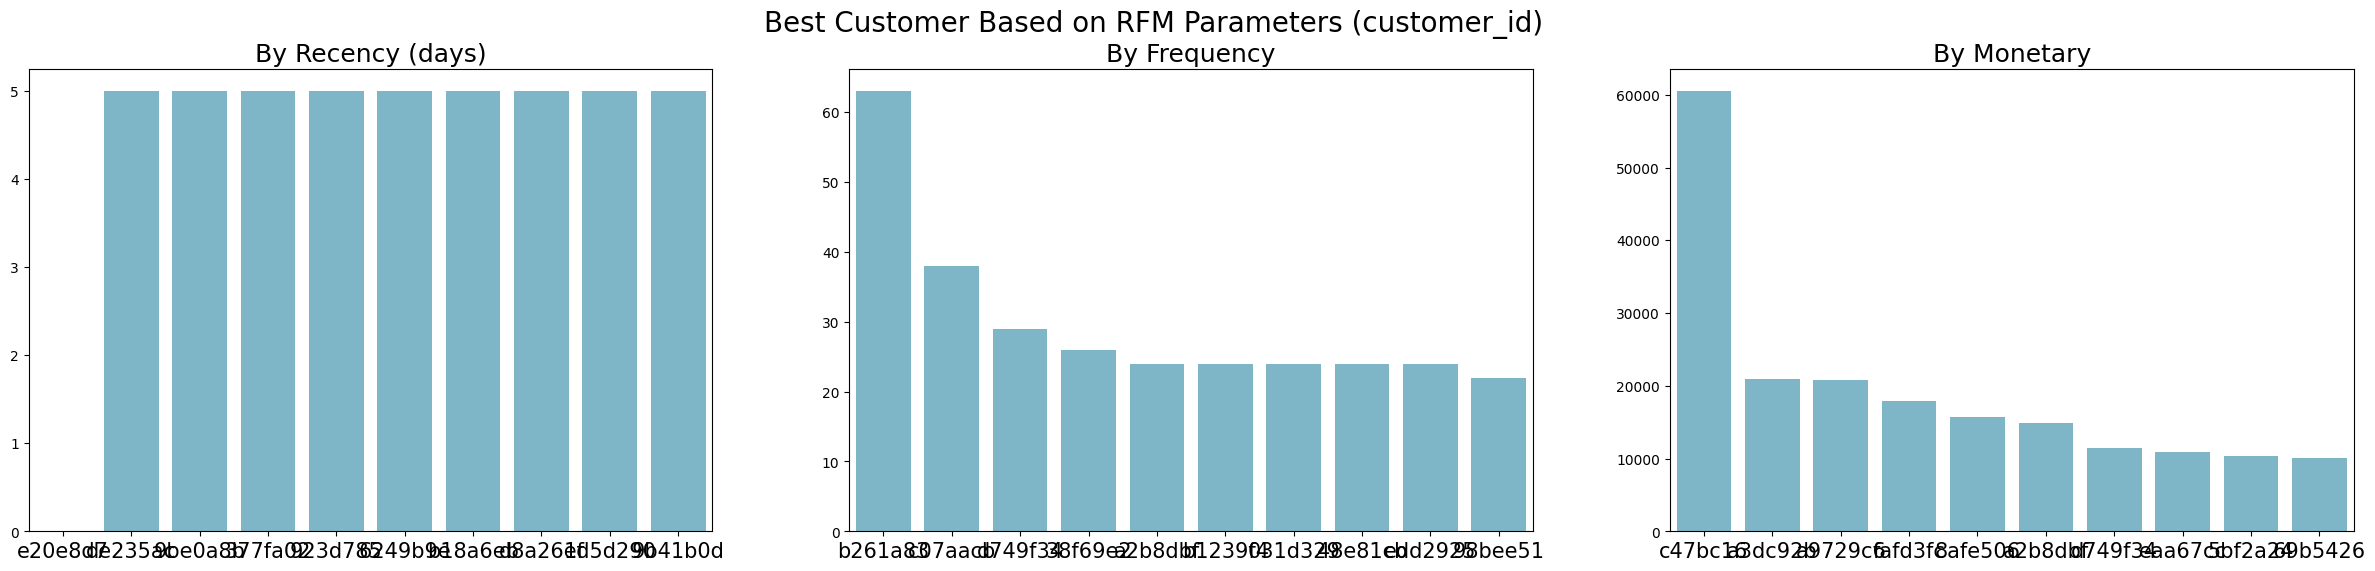

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="cust_id_short", data=df.sort_values(by="recency", ascending=True).head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="cust_id_short", data=df.sort_values(by="frequency", ascending=False).head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="cust_id_short", data=df.sort_values(by="monetary", ascending=False).head(10), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

<Axes: xlabel='monetary'>

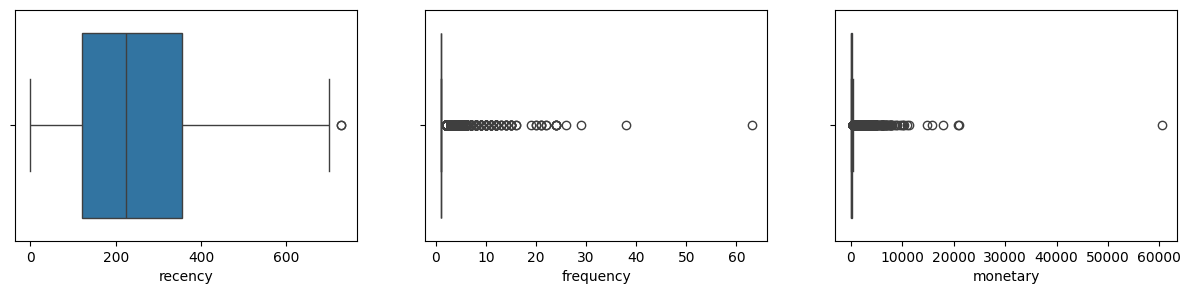

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,3))

sns.boxplot(x=df.recency, ax=ax[0])
sns.boxplot(x=df.frequency, ax=ax[1])
sns.boxplot(x=df.monetary, ax=ax[2])

## Conclusion

- Conclution pertanyaan 1
Berdasarkan visualisasi 1 dapat di simpulkan bahwa order yang paling banyak ada di state SP dan order paling banyak ada di kota sau paulo di susul rio jenario
- conclution pertanyaan 2
Berdasarkan visualisasi 2 dapat disimpulkan bahwa produk yang memiliki score review yang baik adalah bed_bath_table dan health_beauty
- conclution pertanyaan 3
Berdasarkan visualisasi 3 dapat disimpulkan bahwa 97% lebih produk terdeliver dengan baik
- conclution pertanyaan 4
Berdasarkan visualisasi 4 dapat disimpulkan bahwa kategori produk yang paling banyak terjual adalah bed_bath_table dan health_beauty
- conclution pertanyaan 5
Berdasarkan visualisasi 4 dapat disimpulkan bahwa dengan RFM analisis kita dapat mengelompokan customer berdasarkan kapan terakhir melakukan transaksi, berdasrkan seberapa sering customer melakukan transaksi dan berdasarkan revenue yang di hasilkan dari setiap customer

